<a href="https://colab.research.google.com/github/dvillaj/R_Examples/blob/main/Example_Classification_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘reshape2’, ‘partykit’, ‘Cubist’




In [ ]:
library(C50)

In [ ]:
library(rpart)

In [ ]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart.plot)

In [ ]:
install.packages("modeldata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(modeldata)
data(mlc_churn)

In [ ]:
glimpse(mlc_churn)

Rows: 5,000
Columns: 20
$ state                         <fct> KS, OH, NJ, OH, OK, AL, MA, MO, LA, WV,…
$ account_length                <int> 128, 107, 137, 84, 75, 118, 121, 147, 1…
$ area_code                     <fct> area_code_415, area_code_415, area_code…
$ international_plan            <fct> no, no, no, yes, yes, yes, no, yes, no,…
$ voice_mail_plan               <fct> yes, yes, no, no, no, no, yes, no, no, …
$ number_vmail_messages         <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0,…
$ total_day_minutes             <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.…
$ total_day_calls               <int> 110, 123, 114, 71, 113, 98, 88, 79, 97,…
$ total_day_charge              <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.9…
$ total_eve_minutes             <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6…
$ total_eve_calls               <int> 99, 103, 110, 88, 122, 101, 108, 94, 80…
$ total_eve_charge              <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75…
$ total_night_minutes       

In [ ]:
mlc_churn <- mlc_churn %>% mutate(id = row_number())

In [ ]:
churnTrain <- mlc_churn %>% 
          sample_frac(.70)

In [ ]:
churnTest  <- anti_join(mlc_churn, churnTrain, by = 'id')

In [ ]:
select(churnTrain, churn, international_plan, 
                   total_day_minutes, 
                   total_intl_minutes, 
                   total_intl_calls, 
                   number_customer_service_calls) %>% 
    head()

churn,international_plan,total_day_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
no,no,203.2,9.7,3,2
no,no,133.4,11.1,7,1
no,no,281.4,9.0,6,2
no,no,186.7,12.0,4,1
no,no,142.9,15.2,4,1
no,no,251.1,12.7,5,0


In [ ]:
model <- rpart(churn ~ international_plan +
                   total_day_minutes +
                   total_intl_minutes + 
                   total_intl_calls +
                   number_customer_service_calls,
              data = churnTrain,
              parms = list(split = "information")
)

In [ ]:
prediction <- predict( model, churnTest, type = "class")

In [ ]:
churnTest %>% 
    mutate ( churn_predicted = prediction ) %>%
    select ( churn, churn_predicted,
                   international_plan, 
                   total_day_minutes, 
                   total_intl_minutes, 
                   total_intl_calls, 
                   number_customer_service_calls) %>%
    head()

churn,churn_predicted,international_plan,total_day_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
no,no,yes,258.6,11.2,5,0
yes,yes,no,129.1,12.7,6,4
no,no,no,128.8,11.2,2,1
no,no,no,156.6,12.3,5,3
yes,yes,no,332.9,5.4,9,4
no,no,no,189.7,10.0,5,1


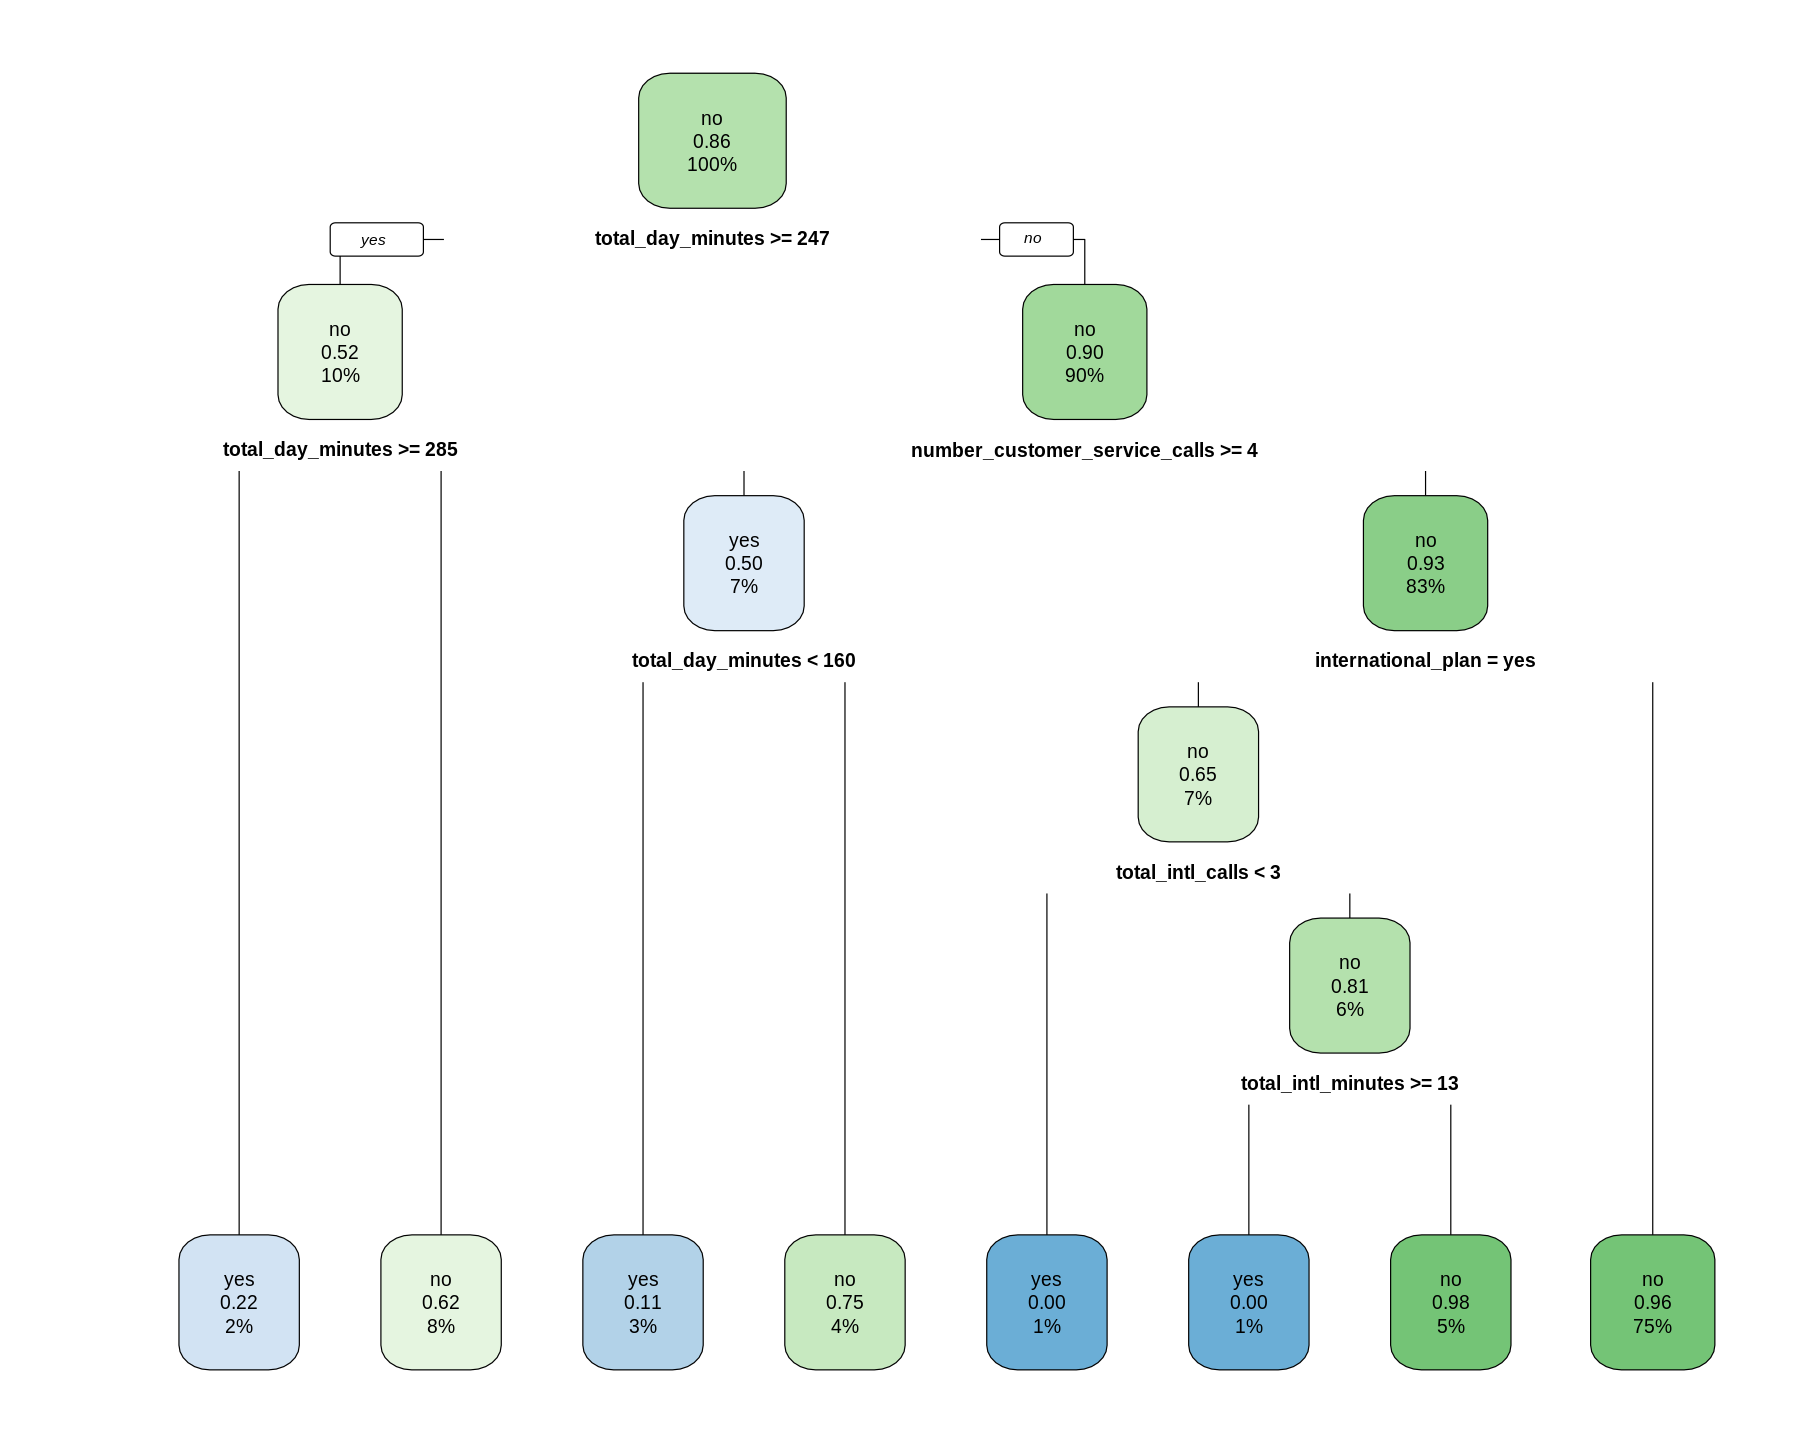

In [ ]:
options(repr.plot.width=15, repr.plot.height=12)

rpart.plot(model)

In [ ]:
table(churnTest$churn, prediction)  %>% 
    as_tibble(.name_repair = "unique") %>%
    rename(original_value = `...1`) %>%
    mutate(`%` = sprintf("%03.2f", n / nrow(churnTest) * 100)) %>%
    arrange(original_value, prediction)

New names:
* `` -> ...1



original_value,prediction,n,%
<chr>,<chr>,<int>,<chr>
no,no,1284,85.60
no,yes,14,0.93
yes,no,98,6.53
yes,yes,104,6.93
